In [1]:
import pandas as pd
import yaml
import sys
import os
import numpy as np
import torch 


In [27]:
obj2_train = '/media/scratch1/jonfrey/models/runs/evaluation/flow-disp/2020-11-14T00:11:36_lr-4/2020-11-14T10:10:15_eval/df/test_df.pkl'
obj2_test = '/media/scratch1/jonfrey/models/runs/evaluation/flow-disp/2020-11-14T00:11:36_lr-4/2020-11-14T10:29:53_eval/df/test_df.pkl'

df = pd.read_pickle(obj2_train)
dataset = 'dataset_train'

In [23]:
df
df.groupby(['ID']).mean()

,init,gt_flow__gt_label,pred_flow__gt_label,pred_flow__flow_mask,pred_flow__pred_label,L1_0,L2_0,L1_1,L2_1,L1_2,L2_2,L1_3,L2_3,L1_4,L2_4,L1_5,L2_5,L1_6,L2_6
ID,,,,,,,,,,,,,,,,,,,
2.0,0.043361,0.00336,0.042665,0.042125,949.053485,25.204486,29.720809,20.339896,22.979926,20.189201,22.867805,12.648043,13.527555,12.303785,13.088288,12.180017,12.931255,12.067034,12.777833


In [24]:
df.groupby(['ID']).std()

,init,gt_flow__gt_label,pred_flow__gt_label,pred_flow__flow_mask,pred_flow__pred_label,L1_0,L2_0,L1_1,L2_1,L1_2,L2_2,L1_3,L2_3,L1_4,L2_4,L1_5,L2_5,L1_6,L2_6
ID,,,,,,,,,,,,,,,,,,,
2.0,0.011057,0.009206,0.027026,0.027069,217.929851,12.638195,17.358797,8.22751,11.662589,8.251251,11.04595,4.64746,6.033124,4.159929,5.22097,4.068094,5.06736,3.844167,4.708522


In [20]:
df['ID'].value_counts()

2.0    500
Name: ID, dtype: int64

dataset_train-epe-adds-samples( 452 )-obj( 2 )-perc( 95 ) -meanADD( 0.0369 )-meanL2( 11.97 )-height-4


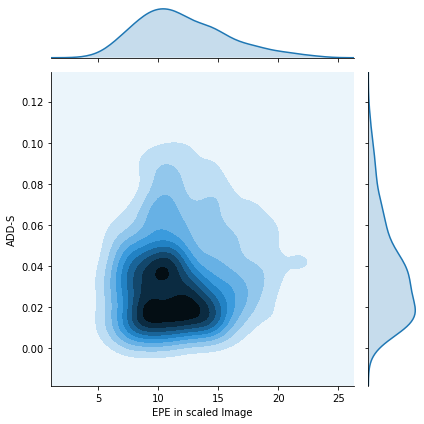

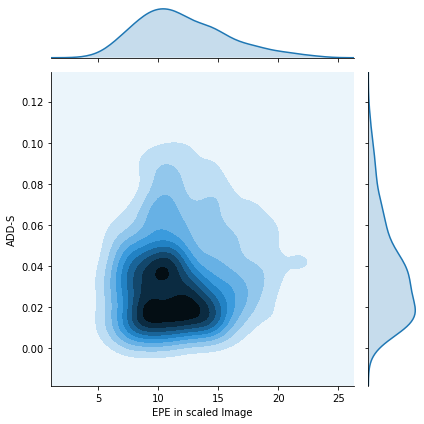

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

adds = np.array( df['pred_flow__gt_label'] )
l2 = np.array( df['L2_6'] )


m = adds != 999
adds = adds[m]
l2 = l2[m]

v_adds = np.percentile(adds, 95, axis=0)
v_l2 = np.percentile(l2, 95, axis=0)

m1 = adds < v_adds
m2 = l2 < v_l2
m3 = m1 * m2

samples = int(np.sum(m3))
obj = int( df['ID'][0] )
per = 95


sns.jointplot(l2[m3], adds[m3], kind = 'kde')#,height=4)
plt.gcf().axes[0].set_xlabel('EPE in scaled Image')
plt.gcf().axes[0].set_ylabel('ADD-S')
plt.tight_layout()

ma = round( np.mean( adds[m3] ), 4)
ml2 = round(np.mean( l2[m3] ), 4)
print(f'{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} )-height-4')
plt.savefig(f"/home/jonfrey/submisson/{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} ).png",dpi=600)
plt.show()


sns.jointplot(l2[m3], adds[m3], kind = 'kde')#,height=4)
plt.gcf().axes[0].set_xlabel('EPE in scaled Image')
plt.gcf().axes[0].set_ylabel('ADD-S')
plt.tight_layout()
plt.savefig(f"/home/jonfrey/submisson/{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} )-height-4.png",dpi=600)
plt.show()

dataset_train-epe-adds-samples( 452 )-obj( 2 )-perc( 95 ) -meanADD( 0.0369 )-meanL2( 11.97 )-height-4


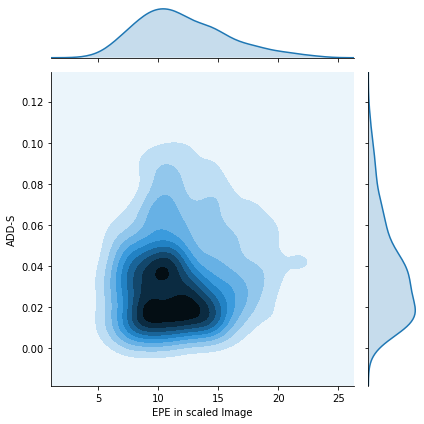

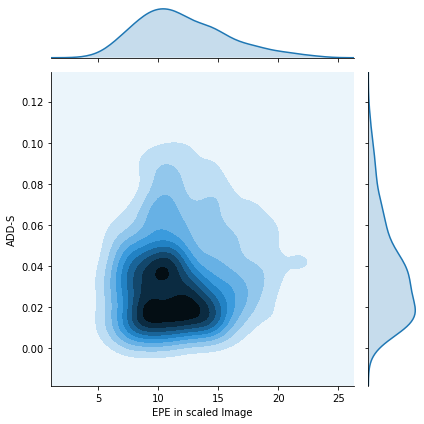

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

adds = np.array( df['pred_flow__gt_label'] )
l2 = np.array( df['L2_6'] )


m = adds != 999
adds = adds[m]
l2 = l2[m]

v_adds = np.percentile(adds, 95, axis=0)
v_l2 = np.percentile(l2, 95, axis=0)

m1 = adds < v_adds
m2 = l2 < v_l2
m3 = m1 * m2

samples = int(np.sum(m3))
obj = int( df['ID'][0] )
per = 95


sns.jointplot(l2[m3], adds[m3], kind = 'kde')#,height=4)
plt.gcf().axes[0].set_xlabel('EPE in scaled Image')
plt.gcf().axes[0].set_ylabel('ADD-S')
plt.tight_layout()

ma = round( np.mean( adds[m3] ), 4)
ml2 = round(np.mean( l2[m3] ), 4)
print(f'{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} )-height-4')
plt.savefig(f"/home/jonfrey/submisson/{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} ).png",dpi=600)
plt.show()


sns.jointplot(l2[m3], adds[m3], kind = 'kde')#,height=4)
plt.gcf().axes[0].set_xlabel('EPE in scaled Image')
plt.gcf().axes[0].set_ylabel('ADD-S')
plt.tight_layout()
plt.savefig(f"/home/jonfrey/submisson/{dataset}-epe-adds-samples( {samples} )-obj( {obj} )-perc( {per} ) -meanADD( {ma} )-meanL2( {ml2} )-height-4.png",dpi=600)
plt.show()